In [1]:
# import the most important libraries
import torch
from torchtext import data
import torch .nn as nn
import torch.nn.functional as F
import numpy as np # linear algebra
import matplotlib . pyplot as plt
import seaborn as sns
import pandas as pd # data processing , CSV file I/O (e.g. pd. read_csv )
from sklearn . model_selection import train_test_split
import random

In [2]:
import time
import cv2
import glob
import random
import numpy as np
from itertools import permutations
from matplotlib import pyplot as plt
train_images_address = 'trainingSet/'

class dataset ():

    def __init__ ( self ):
        self.train_digits_add_dic = {}
        self.data = np.zeros((5050 ,4) ,dtype = int )
        self.data_label = np.zeros((5050 ,1) ,dtype=int)
        self.class_metadata = {0:{ 'sequences':[] , 'class_name':'C','info':'The sequences of this class' 'follow a constant trend'}, 
                               1:{ 'sequences':[] , 'class_name' :'I','info':'The sequences of this class' 'follow an incremental trend'},
                               2:{ 'sequences':[] , 'class_name':'D','info':'The sequences of this class' 'follow a decremental trend '},
                               3:{ 'sequences':[] , 'class_name':'I_D', 'info':'The sequences of this class' 'follow an incremental trend ,' 'followed by a decremental trend'},
                               4:{ 'sequences':[],  'class_name': 'D_I','info': 'The sequences of this class follow a decremental trend ,' ' followed by an incremental trend'},
                               5:{ 'sequences':[], 'class_name': 'I_D_I ','info': 'The sequences of this class follow an incremental trend ,' 'followed by a decremental trend ,followed by an incremental trend '},
                               6:{ 'sequences':[], 'class_name': 'D_I_D','info': 'The sequences of this class follow a decremental trend, ' ' followed by an incremental trend , followed by a decremental trend '}}

    def reading_imgs_address ( self ):
        for i in range (10) :
            imgs_add = []
            for img_add in glob.glob(train_images_address + str(i)+'/*.jpg'):
                imgs_add.append (img_add )
            self.train_digits_add_dic [i] = imgs_add



    def generate_class_sequences ( self ):
        perm = permutations ([0 , 1, 2, 3, 4, 5, 6, 7, 8, 9], 4)
        counter = 0
        for j, sequence in enumerate ( list ( perm )):
            if ( sequence [3] > sequence [2]) and ( sequence [2] > sequence [1]) and ( sequence [1] > sequence [0]) : 
                self.class_metadata[1][ 'sequences']. append ( sequence )
                self.data [j ,:]= sequence
                self.data_label [j ,0] = 1

            if ( sequence [3] < sequence [2]) and ( sequence [2] < sequence [1]) and (sequence [1] < sequence [0]) :
                self . class_metadata [2]['sequences']. append ( sequence )
                self . data [j, :] = sequence
                self . data_label [j, 0] = 2

            if ( sequence [3] < sequence [2]) and ( sequence [2] > sequence [1]) and (sequence [1] > sequence [0]) :
                self . class_metadata [3][ 'sequences']. append ( sequence )
                self . data [j, :] = sequence
                self . data_label [j, 0] = 3

            if ( sequence [3] < sequence [2]) and ( sequence [2] < sequence [1]) and (sequence [1] > sequence [0]) :
                self.class_metadata [3][ 'sequences']. append ( sequence )
                self.data [j, :] = sequence
                self . data_label [j, 0] = 3

            if (sequence[3] > sequence[2]) and (sequence[2] < sequence[1]) and (sequence[1] < sequence[0]):
                self.class_metadata[4]['sequences'].append(sequence) 
                self.data[j, :] = sequence 
                self.data_label[j, 0] = 4

            if (sequence[3] > sequence[2]) and (sequence[2] > sequence[1]) and (sequence[1] < sequence[0]):
                self.class_metadata[4]['sequences'].append(sequence) 
                self.data[j, :] = sequence 
                self.data_label[j, 0] = 4

            if (sequence[3] > sequence[2]) and (sequence[2] < sequence[1]) and (sequence[1] > sequence[0]):
                self.class_metadata[5]['sequences'].append(sequence) 
                self.data[j, :] = sequence 
                self.data_label[j, 0] = 5

            if (sequence[3] < sequence[2]) and (sequence[2] > sequence[1]) and (sequence[1] < sequence[0]):
                self.class_metadata[6]['sequences'].append(sequence) 
                self.data[j, :] = sequence 
                self.data_label[j, 0] = 6
                
            counter = j
        for i in range(10):
            counter +=1 
            self.class_metadata[0]['sequences'].append((i,i,i,i)) 
            self.data[counter,:] = (i,i,i,i) 
            self.data_label[counter,0] = 0

            
    def load_images (self , sequences ):
        images = np. zeros (( sequences.shape[0], sequences.shape[1],28,28) )
#         print(images)
        for i in range ( sequences.shape [0]) :
            for j in range ( sequences [i]. shape [0]) :
                imgs_add = self.train_digits_add_dic[sequences [i][j]]
#                 print(imgs_add)
                random_image_add = imgs_add[random.randrange(0,len(imgs_add))]
                img = cv2 . imread ( random_image_add )
                images [i,j ,:] = img [: ,: ,0]
        return images

    
    def plot (self , class_indx ):
        sequences = self . class_metadata [ class_indx ][ 'sequences']
        random_sequence = sequences [ random.randint (0, len (sequences))]
        seq_imgs_add = []
        for i in range ( len ( random_sequence )):
            img_label = random_sequence [i]
            images_add = self . train_digits_add_dic [ img_label ]
            random_image_add = images_add [ random . randrange(0, len(images_add))]
            seq_imgs_add . append ( random_image_add )
        fig = plt . figure ( figsize =(20 ,20) , dpi =40)
        fig . set_size_inches (35 , 10)
        columns = len ( seq_imgs_add )
        rows = 1
        for i in range (columns):
            img = cv2.imread ( seq_imgs_add [i])
            fig . add_subplot (rows , columns , i+1)
            plt . imshow(img)
        fig . suptitle ('class name : {}\n info : {}'. format ( self . class_metadata [class_indx ][ 'class_name'],self.class_metadata[class_indx ]['info']) ,fontsize =50)
        plt . show ()



# import mnist_loading_dataset
from sklearn . model_selection import KFold , train_test_split
import numpy as np


"""
load data
"""


batch_size = 3
iter =0
dataset = dataset()
dataset.reading_imgs_address()
dataset.generate_class_sequences()
# dataset.plot (1)
#  Training set 
x_train, x_test, y_train, y_test = train_test_split(dataset.data , dataset.data_label , test_size = 0.15 , random_state = 42)
# print(x_train)

# Validation set, Training set 
# x_val, y_val, x_tt, y_tt = train_test_split(x_train,y_train, test_size = 0.15 , random_state = 42 )

# if np.mod( x_train.shape[0] ,batch_size) == 0.0:
#     iter = int( x_train . shape [0]/ batch_size )
# else :
#     iter = int ( x_train . shape [0] / batch_size )+1



# bs = 0
# for i in range ( 10 ):
#     sequences = x_train [bs:bs + batch_size ,:]
#     labels = y_train [bs:bs+ batch_size ]
#     input_images = dataset.load_images(sequences)
# #     print (input_images.shape )

    
# bs = 0
# for i in range ( 10 ):
#     sequences2 = x_test [bs:bs + batch_size ,:]
#     labels2 = y_test [bs:bs+ batch_size ]
#     test_images = dataset.load_images(sequences2)
# #     print (test_images.shape )

#   #  LSTM



In [3]:
X_train = dataset.load_images(x_train)
Y_train = y_train
X_test = dataset.load_images(x_test)
Y_test = y_test
#Reshaping the x train to input to lstm model
X_train = X_train.reshape(X_train.shape[0],4,784)
X_test = X_test.reshape(X_test.shape[0],4,784)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(4292, 4, 784) (4292, 1) (758, 4, 784) (758, 1)


# LSTM

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
# input_size = 784 # 28x28
num_classes = 7
num_epochs = 10
batch_size = 3
learning_rate = 0.001

input_size = 784
sequence_length = 4
hidden_size = 28
num_layers = 2


# Fully connected neural network with one hidden layer
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # -> x needs to be: (batch_size, seq, input_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        out, _ = self.lstm(x, (h0,c0)) 
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (1, 4, 128)
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
        out = self.fc(out)
        # out: (n, 7)
        return out

In [13]:
model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device).float()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [14]:
train_losses = []
test_losses = []
accuracies = []
n_total_steps = len(X_train)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(zip(X_train,Y_train)):  
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
        images = images.reshape(1, sequence_length, input_size)/255
        images = torch.from_numpy(images)
        labels = torch.from_numpy(labels).long()
        
        # Forward pass
        outputs = model(images.float())
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
            
        if (i+1) % 100 == 0:
            train_losses.append(loss.item())
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in zip(X_test[:100],Y_test[:100]):
                    images = images.reshape(1, sequence_length, input_size)/255
                    images = torch.from_numpy(images).float()
                    labels = torch.from_numpy(labels).long()
                    outputs = model(images)
                    test_loss = criterion(outputs, labels).item()
                    # max returns (value ,index)
                    _, predicted = torch.max(outputs.data, 1)
                    n_samples += labels.size(0)
                    n_correct += (predicted == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
                accuracies.append(acc)
                
#             print(f'Accuracy of the network on the {100} Validation data points: {acc} %')
            test_losses.append(test_loss)
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Val_accuracy: {acc}%')

Epoch [1/10], Step [100/4292], Loss: 1.3460, Val_accuracy: 29.0%
Epoch [1/10], Step [200/4292], Loss: 1.4818, Val_accuracy: 29.0%
Epoch [1/10], Step [300/4292], Loss: 1.6434, Val_accuracy: 29.0%
Epoch [1/10], Step [400/4292], Loss: 1.5171, Val_accuracy: 21.0%
Epoch [1/10], Step [500/4292], Loss: 1.7046, Val_accuracy: 21.0%
Epoch [1/10], Step [600/4292], Loss: 1.5818, Val_accuracy: 16.0%
Epoch [1/10], Step [700/4292], Loss: 1.3877, Val_accuracy: 28.0%
Epoch [1/10], Step [800/4292], Loss: 1.5013, Val_accuracy: 26.0%
Epoch [1/10], Step [900/4292], Loss: 1.4180, Val_accuracy: 30.0%
Epoch [1/10], Step [1000/4292], Loss: 1.0524, Val_accuracy: 36.0%
Epoch [1/10], Step [1100/4292], Loss: 1.6339, Val_accuracy: 32.0%
Epoch [1/10], Step [1200/4292], Loss: 1.2840, Val_accuracy: 38.0%
Epoch [1/10], Step [1300/4292], Loss: 2.8227, Val_accuracy: 41.0%
Epoch [1/10], Step [1400/4292], Loss: 0.9968, Val_accuracy: 49.0%
Epoch [1/10], Step [1500/4292], Loss: 0.9148, Val_accuracy: 44.0%
Epoch [1/10], Step 

Epoch [3/10], Step [4200/4292], Loss: 0.0213, Val_accuracy: 79.0%
Epoch [4/10], Step [100/4292], Loss: 0.1289, Val_accuracy: 78.0%
Epoch [4/10], Step [200/4292], Loss: 0.0595, Val_accuracy: 78.0%
Epoch [4/10], Step [300/4292], Loss: 0.1083, Val_accuracy: 80.0%
Epoch [4/10], Step [400/4292], Loss: 0.3135, Val_accuracy: 74.0%
Epoch [4/10], Step [500/4292], Loss: 0.1318, Val_accuracy: 77.0%
Epoch [4/10], Step [600/4292], Loss: 0.0555, Val_accuracy: 77.0%
Epoch [4/10], Step [700/4292], Loss: 0.0286, Val_accuracy: 77.0%
Epoch [4/10], Step [800/4292], Loss: 0.2297, Val_accuracy: 75.0%
Epoch [4/10], Step [900/4292], Loss: 0.0352, Val_accuracy: 78.0%
Epoch [4/10], Step [1000/4292], Loss: 0.0151, Val_accuracy: 78.0%
Epoch [4/10], Step [1100/4292], Loss: 0.8535, Val_accuracy: 77.0%
Epoch [4/10], Step [1200/4292], Loss: 0.0623, Val_accuracy: 76.0%
Epoch [4/10], Step [1300/4292], Loss: 3.1271, Val_accuracy: 79.0%
Epoch [4/10], Step [1400/4292], Loss: 0.0549, Val_accuracy: 77.0%
Epoch [4/10], Step 

Epoch [6/10], Step [4100/4292], Loss: 0.0058, Val_accuracy: 77.0%
Epoch [6/10], Step [4200/4292], Loss: 0.0032, Val_accuracy: 78.0%
Epoch [7/10], Step [100/4292], Loss: 0.0394, Val_accuracy: 77.0%
Epoch [7/10], Step [200/4292], Loss: 0.0349, Val_accuracy: 78.0%
Epoch [7/10], Step [300/4292], Loss: 0.0163, Val_accuracy: 78.0%
Epoch [7/10], Step [400/4292], Loss: 0.0279, Val_accuracy: 78.0%
Epoch [7/10], Step [500/4292], Loss: 0.0204, Val_accuracy: 78.0%
Epoch [7/10], Step [600/4292], Loss: 0.0114, Val_accuracy: 78.0%
Epoch [7/10], Step [700/4292], Loss: 0.0091, Val_accuracy: 77.0%
Epoch [7/10], Step [800/4292], Loss: 0.0815, Val_accuracy: 78.0%
Epoch [7/10], Step [900/4292], Loss: 0.0079, Val_accuracy: 75.0%
Epoch [7/10], Step [1000/4292], Loss: 0.0078, Val_accuracy: 78.0%
Epoch [7/10], Step [1100/4292], Loss: 0.6153, Val_accuracy: 82.0%
Epoch [7/10], Step [1200/4292], Loss: 0.0116, Val_accuracy: 80.0%
Epoch [7/10], Step [1300/4292], Loss: 1.0234, Val_accuracy: 81.0%
Epoch [7/10], Step 

Epoch [9/10], Step [4000/4292], Loss: 0.0156, Val_accuracy: 80.0%
Epoch [9/10], Step [4100/4292], Loss: 0.0030, Val_accuracy: 79.0%
Epoch [9/10], Step [4200/4292], Loss: 0.0032, Val_accuracy: 80.0%
Epoch [10/10], Step [100/4292], Loss: 0.0251, Val_accuracy: 79.0%
Epoch [10/10], Step [200/4292], Loss: 0.0556, Val_accuracy: 79.0%
Epoch [10/10], Step [300/4292], Loss: 0.0138, Val_accuracy: 81.0%
Epoch [10/10], Step [400/4292], Loss: 0.0186, Val_accuracy: 81.0%
Epoch [10/10], Step [500/4292], Loss: 0.0046, Val_accuracy: 85.0%
Epoch [10/10], Step [600/4292], Loss: 0.0012, Val_accuracy: 84.0%
Epoch [10/10], Step [700/4292], Loss: 0.0025, Val_accuracy: 83.0%
Epoch [10/10], Step [800/4292], Loss: 0.0530, Val_accuracy: 80.0%
Epoch [10/10], Step [900/4292], Loss: 0.0018, Val_accuracy: 83.0%
Epoch [10/10], Step [1000/4292], Loss: 0.0056, Val_accuracy: 76.0%
Epoch [10/10], Step [1100/4292], Loss: 0.0317, Val_accuracy: 81.0%
Epoch [10/10], Step [1200/4292], Loss: 0.0068, Val_accuracy: 75.0%
Epoch [

In [15]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in zip(X_test,Y_test):
        images = images.reshape(1, sequence_length, input_size)/255
        images = torch.from_numpy(images).float()
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test data: {acc} %')

Accuracy of the network on the 758 test data: 80.21108179419525 %


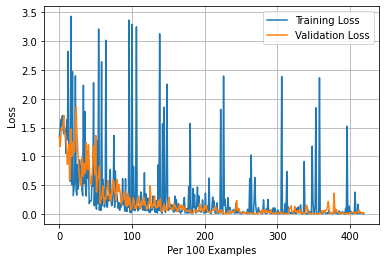

In [16]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.xlabel('Per 100 Examples')
plt.ylabel('Loss')
plt.legend()
plt.grid()

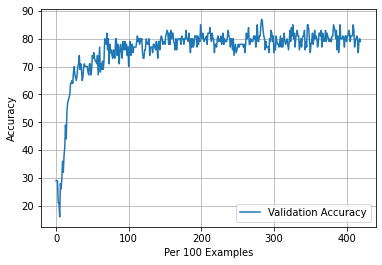

In [17]:
plt.plot(accuracies,label='Validation Accuracy')
plt.xlabel('Per 100 Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
nb_classes = 7
confusion_matrix = np.zeros((nb_classes, nb_classes))
y_pred = []
with torch.no_grad():
    for images, labels in zip(X_test,Y_test):
        images = torch.from_numpy(images).float()/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.append(np.array(preds))
        for t, p in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list(range(0,7))
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,np.array(y_pred),zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.47      0.61      0.53        36
           2       0.72      0.29      0.41        45
           3       0.73      0.84      0.78       187
           4       0.85      0.77      0.81       190
           5       0.75      0.71      0.73       147
           6       0.76      0.82      0.79       152

    accuracy                           0.75       758
   macro avg       0.61      0.58      0.58       758
weighted avg       0.76      0.75      0.75       758



# CNN

In [20]:
X_train = X_train.reshape(X_train.shape[0],4,28,28)
X_test = X_test.reshape(X_test.shape[0],4,28,28)

In [21]:
# Hyperparameters
in_channels = 4
num_classes = 7
learning_rate = 0.001
batch_size = 3
num_epochs = 10

In [22]:
# Simple CNN
class CNN(nn.Module):
    def __init__(self, in_channels=4, num_classes=7):
        super(CNN, self).__init__()
        self.batch1 = nn.BatchNorm2d(4)
        self.conv1 = nn.Conv2d(in_channels=in_channels,out_channels=12,kernel_size=(12, 12),stride=(1, 1),padding=(1, 1))
        self.batch2 = nn.BatchNorm2d(12)
        self.fc1 = nn.Linear(4332,250)
        self.fc2 = nn.Linear(250, num_classes)
        
    def forward(self, x):
        x = self.batch1(x)
        x = F.relu(self.conv1(x))
        x = self.batch2(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [23]:
# Initialize network
model = CNN(in_channels=4, num_classes=7).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
train_losses = []
test_losses = []
accuracies = []
n_total_steps = len(X_train)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(zip(X_train,Y_train)):  
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
        images = torch.from_numpy(images)/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        
        # Forward pass
        outputs = model(images.float())
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
        
        #Validation     
        if (i+1) % 100 == 0:
            train_losses.append(loss.item())
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in zip(X_test[:100],Y_test[:100]):
                    images = torch.from_numpy(images).float()/255
                    images.unsqueeze_(0)
                    labels = torch.from_numpy(labels).long()
                    outputs = model(images)
                    test_loss = criterion(outputs, labels).item()
                    # max returns (value ,index)
                    _, predicted = torch.max(outputs.data, 1)
                    n_samples += labels.size(0)
                    n_correct += (predicted == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
                accuracies.append(acc)
                
#             print(f'Accuracy of the network on the {100} Validation data points: {acc} %')
            test_losses.append(test_loss)
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Val_accuracy: {acc}%')

Epoch [1/10], Step [100/4292], Loss: 0.9616, Val_accuracy: 34.0%
Epoch [1/10], Step [200/4292], Loss: 2.1526, Val_accuracy: 39.0%
Epoch [1/10], Step [300/4292], Loss: 1.1949, Val_accuracy: 28.0%
Epoch [1/10], Step [400/4292], Loss: 1.9479, Val_accuracy: 40.0%
Epoch [1/10], Step [500/4292], Loss: 3.6882, Val_accuracy: 43.0%
Epoch [1/10], Step [600/4292], Loss: 1.6048, Val_accuracy: 42.0%
Epoch [1/10], Step [700/4292], Loss: 1.4846, Val_accuracy: 39.0%
Epoch [1/10], Step [800/4292], Loss: 1.7601, Val_accuracy: 50.0%
Epoch [1/10], Step [900/4292], Loss: 0.6829, Val_accuracy: 45.0%
Epoch [1/10], Step [1000/4292], Loss: 1.7011, Val_accuracy: 47.0%
Epoch [1/10], Step [1100/4292], Loss: 1.5740, Val_accuracy: 53.0%
Epoch [1/10], Step [1200/4292], Loss: 0.8443, Val_accuracy: 49.0%
Epoch [1/10], Step [1300/4292], Loss: 2.8018, Val_accuracy: 47.0%
Epoch [1/10], Step [1400/4292], Loss: 1.1695, Val_accuracy: 52.0%
Epoch [1/10], Step [1500/4292], Loss: 0.7872, Val_accuracy: 50.0%
Epoch [1/10], Step 

Epoch [3/10], Step [4200/4292], Loss: 1.8045, Val_accuracy: 58.0%
Epoch [4/10], Step [100/4292], Loss: 0.5971, Val_accuracy: 55.0%
Epoch [4/10], Step [200/4292], Loss: 0.1424, Val_accuracy: 59.0%
Epoch [4/10], Step [300/4292], Loss: 0.1393, Val_accuracy: 59.0%
Epoch [4/10], Step [400/4292], Loss: 0.2253, Val_accuracy: 61.0%
Epoch [4/10], Step [500/4292], Loss: 1.6607, Val_accuracy: 62.0%
Epoch [4/10], Step [600/4292], Loss: 0.6017, Val_accuracy: 60.0%
Epoch [4/10], Step [700/4292], Loss: 0.2344, Val_accuracy: 57.0%
Epoch [4/10], Step [800/4292], Loss: 0.0700, Val_accuracy: 56.0%
Epoch [4/10], Step [900/4292], Loss: 0.0660, Val_accuracy: 57.0%
Epoch [4/10], Step [1000/4292], Loss: 0.7152, Val_accuracy: 56.0%
Epoch [4/10], Step [1100/4292], Loss: 2.5918, Val_accuracy: 52.0%
Epoch [4/10], Step [1200/4292], Loss: 0.0559, Val_accuracy: 59.0%
Epoch [4/10], Step [1300/4292], Loss: 8.6179, Val_accuracy: 58.0%
Epoch [4/10], Step [1400/4292], Loss: 1.5253, Val_accuracy: 56.0%
Epoch [4/10], Step 

Epoch [6/10], Step [4100/4292], Loss: 0.0115, Val_accuracy: 59.0%
Epoch [6/10], Step [4200/4292], Loss: 0.0020, Val_accuracy: 62.0%
Epoch [7/10], Step [100/4292], Loss: 0.0186, Val_accuracy: 62.0%
Epoch [7/10], Step [200/4292], Loss: 0.4093, Val_accuracy: 63.0%
Epoch [7/10], Step [300/4292], Loss: 0.0015, Val_accuracy: 63.0%
Epoch [7/10], Step [400/4292], Loss: 0.3221, Val_accuracy: 67.0%
Epoch [7/10], Step [500/4292], Loss: 0.0001, Val_accuracy: 68.0%
Epoch [7/10], Step [600/4292], Loss: 0.0166, Val_accuracy: 64.0%
Epoch [7/10], Step [700/4292], Loss: 0.0234, Val_accuracy: 62.0%
Epoch [7/10], Step [800/4292], Loss: 0.0001, Val_accuracy: 56.0%
Epoch [7/10], Step [900/4292], Loss: 0.0000, Val_accuracy: 60.0%
Epoch [7/10], Step [1000/4292], Loss: 0.0011, Val_accuracy: 62.0%
Epoch [7/10], Step [1100/4292], Loss: 0.0004, Val_accuracy: 59.0%
Epoch [7/10], Step [1200/4292], Loss: 0.0001, Val_accuracy: 56.0%
Epoch [7/10], Step [1300/4292], Loss: 0.5875, Val_accuracy: 61.0%
Epoch [7/10], Step 

KeyboardInterrupt: 

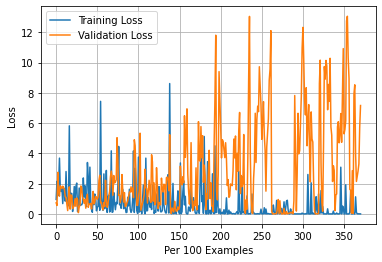

In [25]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.xlabel('Per 100 Examples')
plt.ylabel('Loss')
plt.legend()
plt.grid()

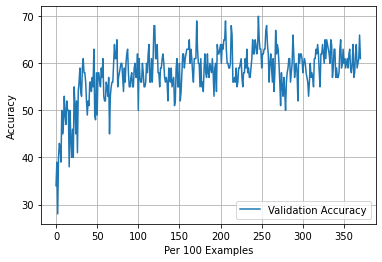

In [26]:
plt.plot(accuracies,label='Validation Accuracy')
plt.xlabel('Per 100 Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [27]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in zip(X_test,Y_test):
        images = torch.from_numpy(images).float()/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test data: {acc} %')

Accuracy of the network on the 758 test data: 61.477572559366756 %


Text(0.5, 69.0, 'Predicted label')

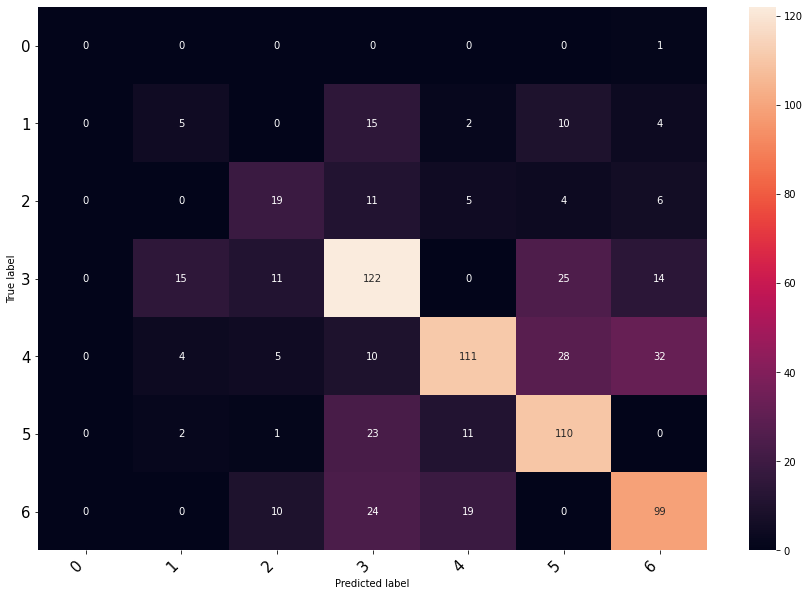

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
nb_classes = 7
confusion_matrix = np.zeros((nb_classes, nb_classes))
y_pred = []
with torch.no_grad():
    for images, labels in zip(X_test,Y_test):
        images = torch.from_numpy(images).float()/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.append(np.array(preds))
        for t, p in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list(range(0,7))
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,np.array(y_pred),zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.19      0.14      0.16        36
           2       0.41      0.42      0.42        45
           3       0.60      0.65      0.62       187
           4       0.75      0.58      0.66       190
           5       0.62      0.75      0.68       147
           6       0.63      0.65      0.64       152

    accuracy                           0.61       758
   macro avg       0.46      0.46      0.45       758
weighted avg       0.62      0.61      0.61       758



# CNN+LSTM Version 1
accuracy may increace with no. of epochs

In [22]:
X_train = X_train.reshape(X_train.shape[0],4,28,28)
X_test = X_test.reshape(X_test.shape[0],4,28,28)

In [135]:
# Simple CNN
class CNN(nn.Module):
    def __init__(self, in_channels=4, num_classes=7):
        super(CNN, self).__init__()
#         self.batch1 = nn.BatchNorm2d(4)
        self.conv1 = nn.Conv2d(in_channels=in_channels,out_channels=12,kernel_size=(12, 12),stride=(1, 1),padding=(1, 1))
        self.batch2 = nn.BatchNorm2d(12)
#         self.fc1 = nn.Linear(972,320)
#         self.fc2 = nn.Linear(320, num_classes)
        
    def forward(self, x):
#         x = self.batch1(x)
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = self.batch2(x)
        x = x.reshape(x.shape[0], -1)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
        return x
    
num_classes = 7
num_epochs = 2
batch_size = 3

input_size = 972
sequence_length = 4
hidden_size = 28
num_layers = 2

# Fully connected neural network with one hidden layer
class Combine(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Combine, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.cnn = CNN()
        # -> x needs to be: (batch_size, seq, input_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.cnn(x)
        x = x.reshape(1,1,972)
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        out, _ = self.lstm(x, (h0,c0)) 
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (1, 4, 128)
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
        out = self.fc(out)
        # out: (n, 7)
        return out  


In [136]:
# Initialize network
model = Combine(input_size, hidden_size, num_layers, num_classes).to(device).float()
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [137]:
train_losses = []
test_losses = []
accuracies = []
n_total_steps = len(X_train)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(zip(X_train,Y_train)):  
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
        images = torch.from_numpy(images)/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        
        # Forward pass
        outputs = model(images.float())
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
        
        #Validation     
        if (i+1) % 100 == 0:
            train_losses.append(loss.item())
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in zip(X_test[:100],Y_test[:100]):
                    images = torch.from_numpy(images).float()/255
                    images.unsqueeze_(0)
                    labels = torch.from_numpy(labels).long()
                    outputs = model(images)
                    test_loss = criterion(outputs, labels).item()
                    # max returns (value ,index)
                    _, predicted = torch.max(outputs.data, 1)
                    n_samples += labels.size(0)
                    n_correct += (predicted == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
                accuracies.append(acc)
                
#             print(f'Accuracy of the network on the {100} Validation data points: {acc} %')
            test_losses.append(test_loss)
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Val_accuracy: {acc}%')

Epoch [1/2], Step [100/4292], Loss: 1.6614, Val_accuracy: 31.0%
Epoch [1/2], Step [200/4292], Loss: 1.4551, Val_accuracy: 29.0%
Epoch [1/2], Step [300/4292], Loss: 1.6524, Val_accuracy: 29.0%
Epoch [1/2], Step [400/4292], Loss: 1.5365, Val_accuracy: 22.0%
Epoch [1/2], Step [500/4292], Loss: 1.6451, Val_accuracy: 21.0%
Epoch [1/2], Step [600/4292], Loss: 1.5240, Val_accuracy: 16.0%
Epoch [1/2], Step [700/4292], Loss: 1.3641, Val_accuracy: 21.0%
Epoch [1/2], Step [800/4292], Loss: 1.5069, Val_accuracy: 16.0%
Epoch [1/2], Step [900/4292], Loss: 1.6353, Val_accuracy: 22.0%
Epoch [1/2], Step [1000/4292], Loss: 1.3267, Val_accuracy: 34.0%
Epoch [1/2], Step [1100/4292], Loss: 1.3447, Val_accuracy: 21.0%
Epoch [1/2], Step [1200/4292], Loss: 1.6990, Val_accuracy: 31.0%
Epoch [1/2], Step [1300/4292], Loss: 2.8670, Val_accuracy: 39.0%
Epoch [1/2], Step [1400/4292], Loss: 1.2198, Val_accuracy: 38.0%
Epoch [1/2], Step [1500/4292], Loss: 1.6333, Val_accuracy: 35.0%
Epoch [1/2], Step [1600/4292], Los

In [138]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in zip(X_test,Y_test):
        images = torch.from_numpy(images).float()/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test data: {acc} %')

Accuracy of the network on the 758 test data: 51.58311345646438 %


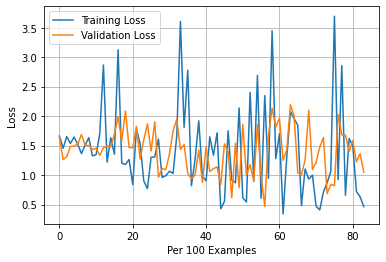

In [139]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.xlabel('Per 100 Examples')
plt.ylabel('Loss')
plt.legend()
plt.grid()

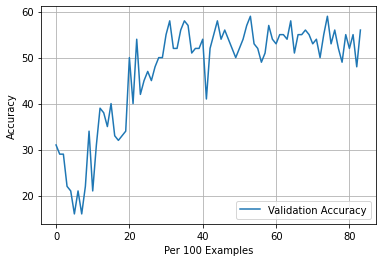

In [140]:
plt.plot(accuracies,label='Validation Accuracy')
plt.xlabel('Per 100 Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

Text(0.5, 69.0, 'Predicted label')

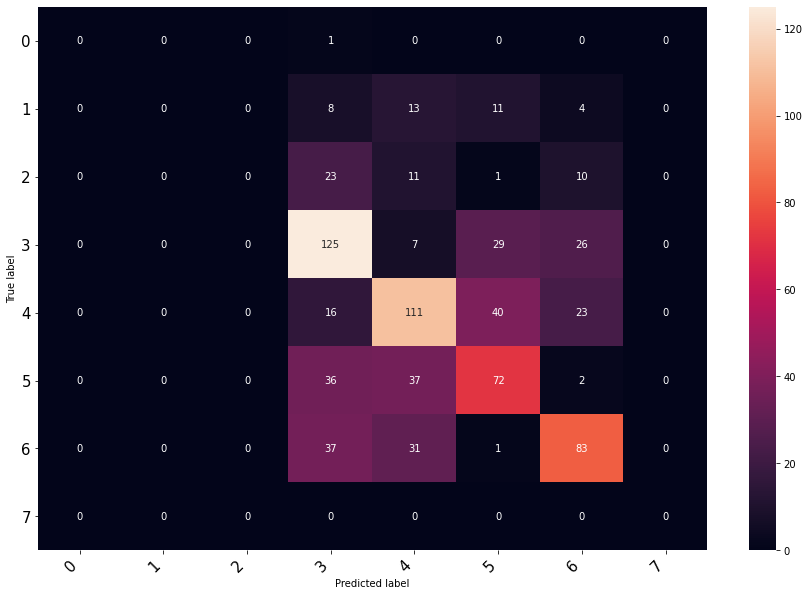

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
nb_classes = 8
confusion_matrix = np.zeros((nb_classes, nb_classes))
y_pred = []
with torch.no_grad():
    for images, labels in zip(X_test,Y_test):
        images = torch.from_numpy(images).float()/255
        images.unsqueeze_(0)
        labels = torch.from_numpy(labels).long()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.append(np.array(preds))
        for t, p in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list(range(0,8))
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [142]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,np.array(y_pred),zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        45
           3       0.51      0.67      0.58       187
           4       0.53      0.58      0.55       190
           5       0.47      0.49      0.48       147
           6       0.56      0.55      0.55       152

    accuracy                           0.52       758
   macro avg       0.30      0.33      0.31       758
weighted avg       0.46      0.52      0.49       758

